**FAKE NEWS DETECTION AND ANALYSIS**

**19PD04 - AKSHAYA L**

**19PD19 - KRITHIKA V**

**19PD24 - NIVETHA B**

**19PD42 - AMELIA B A K**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 **Warning : To ignore the warnings.**

**Inline : To have the plots in the working screen.**




In [2]:
import nltk


In [3]:
from google.colab import files
uploaded = files.upload()

Saving fake.csv to fake.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df=pd.read_csv("fake.csv",engine='python')

In [ ]:
import io
df3 = pd.read_csv(io.BytesIO(uploaded["True.csv"]))

In [ ]:
df.head(10)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,25689.0,Hillary Goes Absolutely Berserk On Protester A...,0.000,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,0,1,0,0,0,bias
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,25689.0,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,25689.0,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,25689.0,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,25689.0,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [ ]:
df.shape

(12999, 20)

**12999 rows and 20 columns**

In [ ]:
df.isnull().sum(axis=0)

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

**To check for null values row wise in each column.**

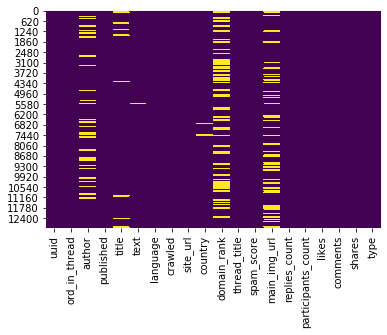

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

**To plot multiple pairwise bivariate distributions in a dataset**

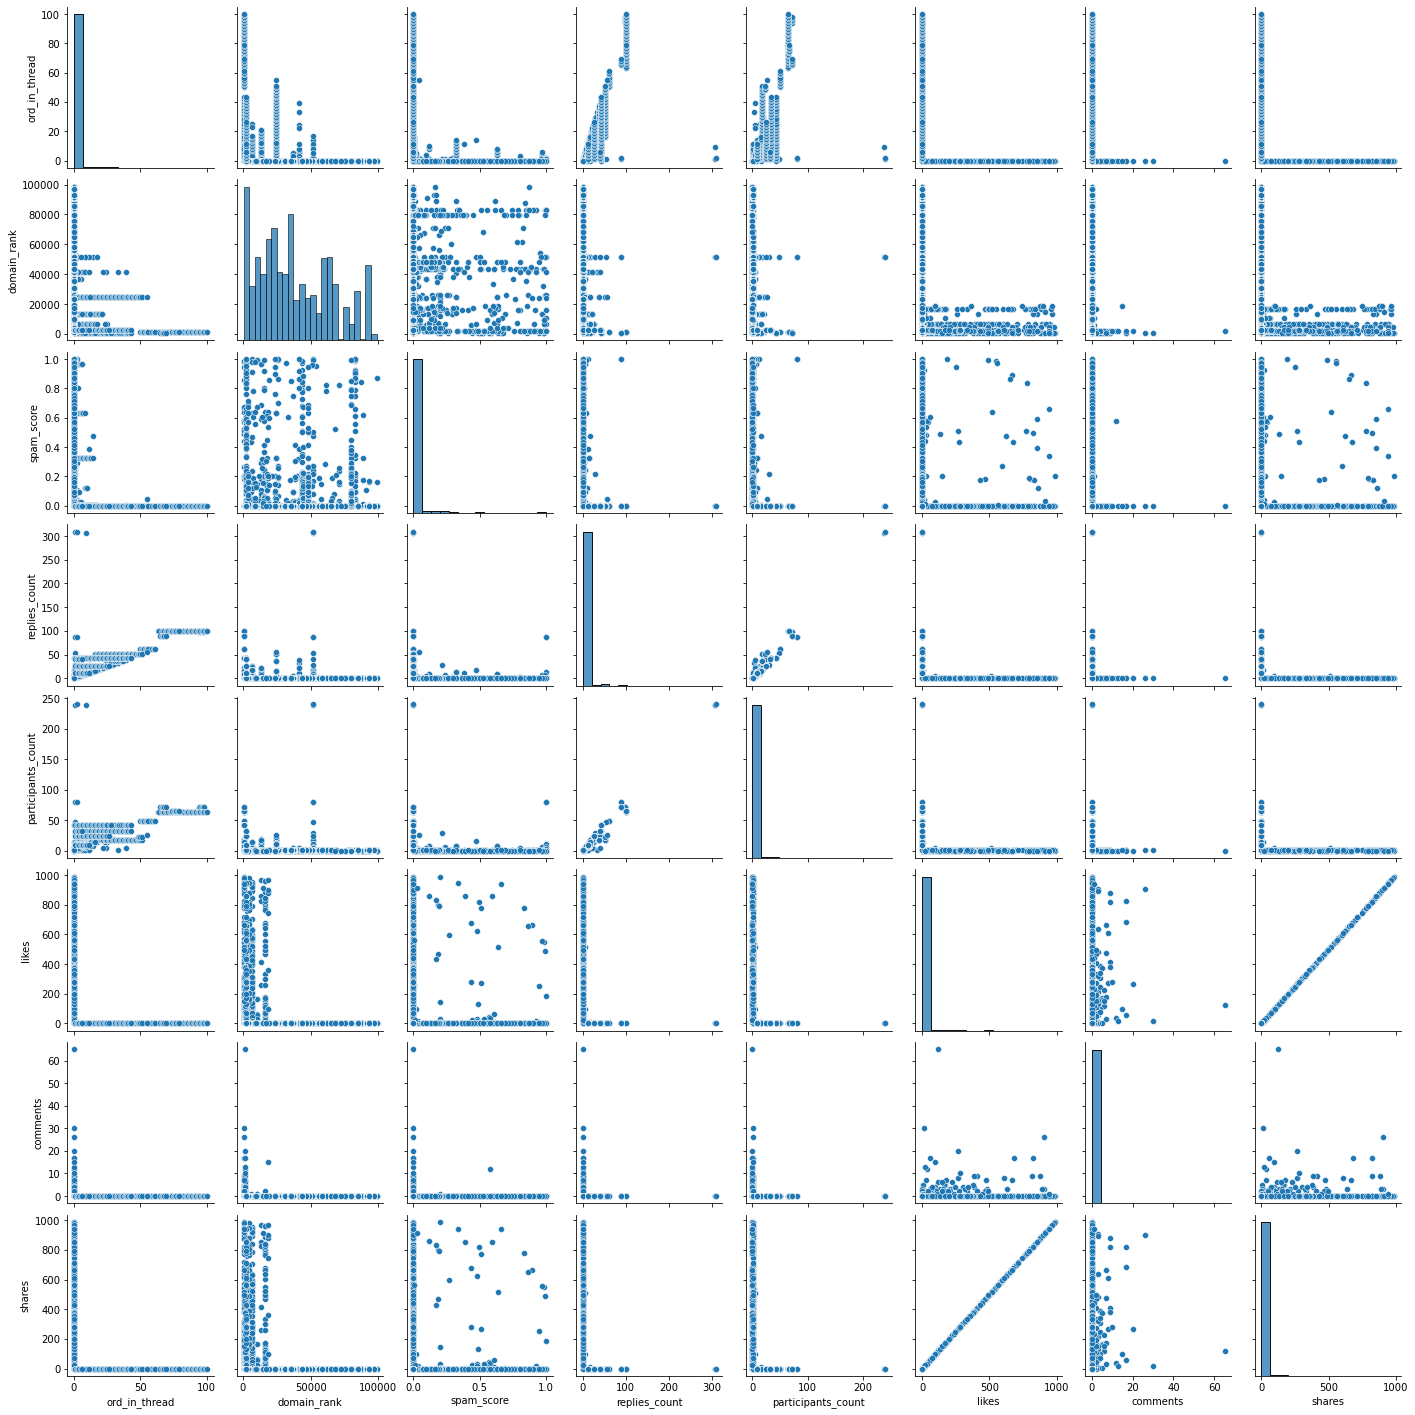

In [ ]:
sns.pairplot(df)

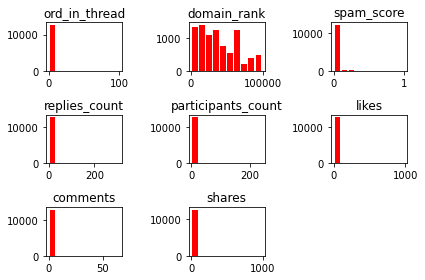

In [ ]:
colors=['r','y','g','b']
df.hist(figsize=(6,4),rwidth=0.8,color='r',grid=False)
plt.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [ ]:
df['uuid'].value_counts().unique()

array([1], dtype=int64)

In [ ]:
len(df['uuid'].value_counts())

12999

In [ ]:
df1 = df.drop('uuid',axis=1)

In [ ]:
df1.head(1)

,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


In [ ]:
count=df1['ord_in_thread'].value_counts()

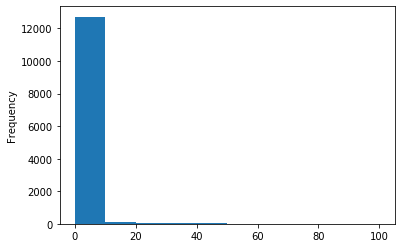

In [ ]:
df1['ord_in_thread'].plot(kind='hist')

In [ ]:
df1['author'].isnull().sum(axis=0)

2424

**Too many values for authors- not useful for analysis**

In [ ]:
df1= df1.dropna(subset=['author'])

In [ ]:
df1.shape

(10575, 19)

In [ ]:
df1['author'].unique()

array(['Barracuda Brigade', 'reasoning with facts', 'Fed Up', ...,
       'major major maj...', 'beemasters', 'i&#039;m-confused'],
      dtype=object)

In [ ]:
len(df1['author'].value_counts())

2259

In [ ]:
df1['published']= pd.to_datetime(df1['published'])

In [ ]:
df1.head()

,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,0,Barracuda Brigade,2016-10-26 21:41:00+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,0,reasoning with facts,2016-10-29 08:47:11.259000+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,0,Barracuda Brigade,2016-10-31 01:41:49.479000+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,0,Fed Up,2016-11-01 05:22:00+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0,Fed Up,2016-11-01 21:56:00+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [ ]:
df1['published_month']= df1['published'].apply(lambda x: x.month)

In [ ]:
df1['published_date']=df1['published'].apply(lambda x: x.day)

In [ ]:
df1.head(5)

,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,...,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,published_month,published_date
0,0,Barracuda Brigade,2016-10-26 21:41:00+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,10,26
1,0,reasoning with facts,2016-10-29 08:47:11.259000+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,10,29
2,0,Barracuda Brigade,2016-10-31 01:41:49.479000+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,10,31
3,0,Fed Up,2016-11-01 05:22:00+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,11,1
4,0,Fed Up,2016-11-01 21:56:00+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,11,1


In [ ]:
df1.head(5)

,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,...,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,published_month,published_date
0,0,Barracuda Brigade,2016-10-26 21:41:00+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,10,26
1,0,reasoning with facts,2016-10-29 08:47:11.259000+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,10,29
2,0,Barracuda Brigade,2016-10-31 01:41:49.479000+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,10,31
3,0,Fed Up,2016-11-01 05:22:00+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,11,1
4,0,Fed Up,2016-11-01 21:56:00+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,11,1


In [ ]:
df1['published_year']= df1['published'].apply(lambda x: x.year)

In [ ]:
df1['published_hour']= df1['published'].apply(lambda x: x.hour)

In [ ]:
df1['title'].value_counts()

Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                         6
If Hillary Clinton Is Charged With Obstruction Of Justice She Could Go To Prison For 20 Years                              5
Will Barack Obama Delay Or Suspend The Election If Hillary Is Forced Out By The New FBI Email Investigation?               5
Let’s Be Clear – A Vote For Warmonger Hillary Clinton Is A Vote For World War 3                                            5
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                                   5
                                                                                                                          ..
New Tests Put Perspective to 100x Reporting Limit Aluminum in Sacramento Rain: Geoengineering Evidence                     1
Message for the 1st Wave Ascension Crew Leaving the Matrix [VIDEO]                                                         1


In [ ]:
len(df1['title'].value_counts())

9404

In [ ]:
df1 = df1.dropna(subset=['title','text'])

**When the title is a subset of it's content**

In [ ]:
df1['language'].value_counts()

english       9514
spanish        146
german         108
russian         58
french          27
turkish          9
italian          7
ignore           7
portuguese       5
arabic           5
norwegian        3
greek            2
finnish          1
polish           1
dutch            1
chinese          1
Name: language, dtype: int64

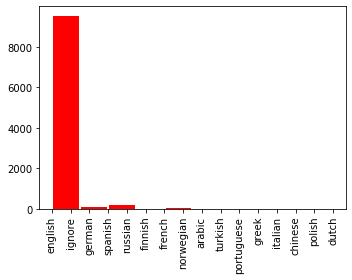

In [ ]:
df1['language'].hist(grid=False,figsize=(5,4),rwidth=0.9,color='r',xrot=90)
plt.tight_layout()

**Most of the texts are in English**

In [ ]:
df1['crawled']= pd.to_datetime(df1['crawled'])

In [ ]:
df1['crawled_month']= df1['crawled'].apply(lambda x: x.month)

In [ ]:
df1['crawled_year']= df1['crawled'].apply(lambda x: x.year)

In [ ]:
df1['crawled_hour']= df1['crawled'].apply(lambda x: x.hour)

In [ ]:
df1['crawled_date']=df1['crawled'].apply(lambda x: x.day)

In [ ]:
df1.head(1)

,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,...,shares,type,published_month,published_date,published_year,published_hour,crawled_month,crawled_year,crawled_hour,crawled_date
0,0,Barracuda Brigade,2016-10-26 21:41:00+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27 01:49:27.168000+03:00,100percentfedup.com,US,25689.0,...,0,bias,10,26,2016,21,10,2016,1,27


In [ ]:
df1['published_month'].describe()

count    9895.000000
mean       10.520061
std         0.499623
min        10.000000
25%        10.000000
50%        11.000000
75%        11.000000
max        11.000000
Name: published_month, dtype: float64

In [ ]:
df1['site_url']

0        100percentfedup.com
1        100percentfedup.com
2        100percentfedup.com
3        100percentfedup.com
4        100percentfedup.com
                ...         
12907          zerohedge.com
12909          zerohedge.com
12910          zerohedge.com
12911          zerohedge.com
12912          zerohedge.com
Name: site_url, Length: 9895, dtype: object

In [ ]:
df1['site_url'].value_counts()

amtvmedia.com          100
worldtruth.tv          100
nakedcapitalism.com    100
trueactivist.com       100
greanvillepost.com     100
                      ... 
bignuggetnews.com        1
truthdig.com             1
bigbluevision.org        1
theonion.com             1
opednews.com             1
Name: site_url, Length: 183, dtype: int64

In [ ]:
df1['site_name']= df1['site_url'].apply(lambda x: x.split('.')[0])

**Removing .com**

In [ ]:
df1.head(1)

,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,...,type,published_month,published_date,published_year,published_hour,crawled_month,crawled_year,crawled_hour,crawled_date,site_name
0,0,Barracuda Brigade,2016-10-26 21:41:00+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27 01:49:27.168000+03:00,100percentfedup.com,US,25689.0,...,bias,10,26,2016,21,10,2016,1,27,100percentfedup


In [ ]:
df1 = df1.drop('site_url',axis=1)

In [ ]:
df1 = df1.dropna(subset=['country'])

In [ ]:
df1['country'].unique()

array(['US', 'CO', 'DE', 'EU', 'NL', 'GB', 'ME', 'ES', 'RU', 'CA', 'IN',
       'TV', 'FR', 'SE', 'ZA', 'IS', 'BG'], dtype=object)

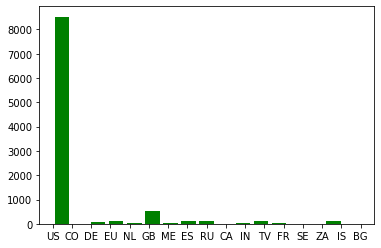

In [ ]:
df1['country'].hist(grid=False,rwidth=0.8,color='g',bins=17)

**The country with highest number of values is US**

In [ ]:
df1['domain_rank'].nunique()

102

In [ ]:
df1= df1.dropna(subset=['thread_title'])

**Removes null values in thread title**

In [ ]:
df1['thread_title'].unique()

array(['Muslims BUSTED: They Stole Millions In Gov’t Benefits',
       'Re: Why Did Attorney General Loretta Lynch Plead The Fifth?',
       'BREAKING: Weiner Cooperating With FBI On Hillary Email Investigation',
       ..., 'Rules For Rulers (Or How The World Really Works)',
       'Caught On Tape: ISIS Destroys Iraqi Abrams With Anti-Tank Missile',
       'ObamaCare Architect Admits "The Law Is Working As Designed" As Premiums Spike'],
      dtype=object)

In [ ]:
df1['spam_score'].describe()

count    9809.000000
mean        0.014846
std         0.096256
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: spam_score, dtype: float64

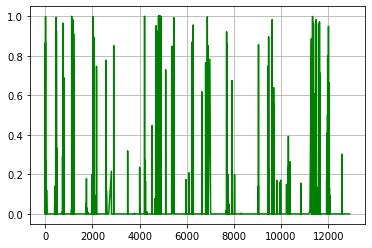

In [ ]:
df1['spam_score'].plot(color='g',kind='line',grid=True)

In [ ]:
df1['main_img_url'].nunique()

5483

In [ ]:
df1 = df1.drop('main_img_url',axis=1)

**main_img_url has no contribution**

In [ ]:
df1.head(1)

,ord_in_thread,author,published,title,text,language,crawled,country,domain_rank,thread_title,...,type,published_month,published_date,published_year,published_hour,crawled_month,crawled_year,crawled_hour,crawled_date,site_name
0,0,Barracuda Brigade,2016-10-26 21:41:00+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27 01:49:27.168000+03:00,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,...,bias,10,26,2016,21,10,2016,1,27,100percentfedup


In [ ]:
df1.isnull().sum(axis=0)

ord_in_thread            0
author                   0
published                0
title                    0
text                     0
language                 0
crawled                  0
country                  0
domain_rank           3557
thread_title             0
spam_score               0
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
published_month          0
published_date           0
published_year           0
published_hour           0
crawled_month            0
crawled_year             0
crawled_hour             0
crawled_date             0
site_name                0
dtype: int64

In [ ]:
df1['replies_count'].value_counts()

0     9791
1       10
5        2
4        2
2        2
6        1
17       1
Name: replies_count, dtype: int64

In [ ]:
df1['replies_count'].describe()

count    9809.000000
mean        0.005607
std         0.208088
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.000000
Name: replies_count, dtype: float64

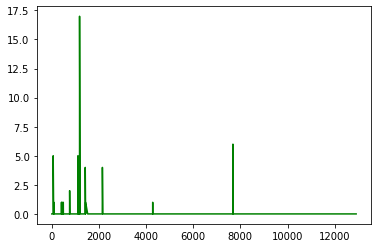

In [ ]:
df1['replies_count'].plot(c='g')

**Very few posts with high replies count**

In [ ]:
df1['participants_count'].value_counts()

1     9379
0      415
2        9
5        3
3        2
15       1
Name: participants_count, dtype: int64

In [ ]:
df1['participants_count'].describe()

count    9809.000000
mean        0.961668
std         0.259719
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: participants_count, dtype: float64

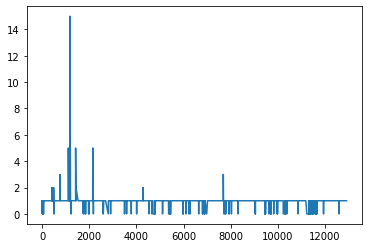

In [ ]:
df1['participants_count'].plot()

In [ ]:
df1['likes'].value_counts()

0      9479
3         9
1         8
2         5
12        5
       ... 
23        1
931       1
959       1
699       1
891       1
Name: likes, Length: 231, dtype: int64

In [ ]:
df1['likes'].describe()

count    9809.000000
mean        9.856254
std        76.485812
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       988.000000
Name: likes, dtype: float64

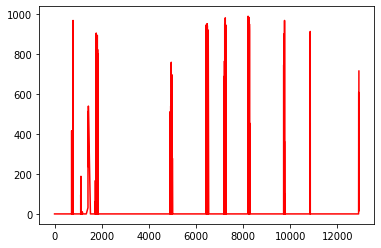

In [ ]:
df1['likes'].plot(c='r')

**Shows posts with high likes count**

In [ ]:
c=df1['comments'].value_counts()

In [ ]:
c

0     9771
3        8
1        6
2        5
4        4
9        3
7        2
5        2
17       2
8        2
15       1
30       1
6        1
26       1
Name: comments, dtype: int64

In [ ]:
c[1:]

3     8
1     6
2     5
4     4
9     3
7     2
5     2
17    2
8     2
15    1
30    1
6     1
26    1
Name: comments, dtype: int64

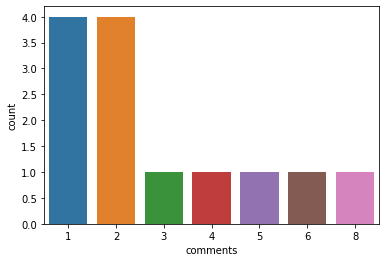

In [ ]:
sns.countplot(df1['comments'].value_counts()[1:])

In [ ]:
df1['shares'].value_counts()

0      9479
3         9
1         8
2         5
12        5
       ... 
23        1
931       1
959       1
699       1
891       1
Name: shares, Length: 231, dtype: int64

In [ ]:
df1['type'].value_counts()

bs            8888
bias           290
conspiracy     269
hate           245
junksci         97
fake            14
state            6
Name: type, dtype: int64

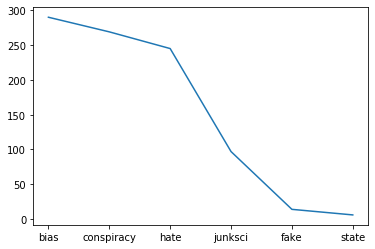

In [ ]:
plt.plot(df1['type'].value_counts()[1:])

**The type with highest number of posts is bias**

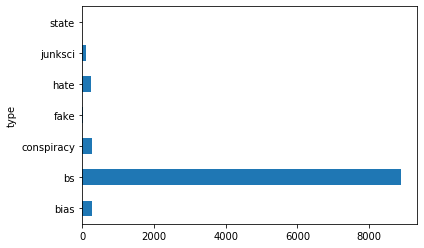

In [ ]:
df1.groupby(['type']).size().plot(kind='barh')

In [ ]:
fake_news = df1[df1["type"] == "fake"]

In [ ]:
fake_news.head(1)

,ord_in_thread,author,published,title,text,language,crawled,country,domain_rank,thread_title,...,type,published_month,published_date,published_year,published_hour,crawled_month,crawled_year,crawled_hour,crawled_date,site_name
57,0,Jimmy Rustling,2016-10-27 13:00:00+03:00,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,english,2016-10-27 15:50:22.818000+03:00,CO,65078.0,The Amish In America Commit Their Vote To Dona...,...,fake,10,27,2016,13,10,2016,15,27,abcnews


In [ ]:
import nltk

In [ ]:
fake_news.title.fillna("", inplace=True)
fake_news.text.fillna("", inplace=True)

In [ ]:
all_text= fake_news.title.str.cat(fake_news.text, sep=' ')

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
all_text.head()

In [ ]:
fake_news_words = nltk.word_tokenize(" ".join(all_text.tolist()))

In [ ]:
fake_news_words

['The',
 'Amish',
 'In',
 'America',
 'Commit',
 'Their',
 'Vote',
 'To',
 'Donald',
 'Trump',
 ';',
 'Mathematically',
 'Guaranteeing',
 'Him',
 'A',
 'Presidential',
 'Victory',
 '-',
 'ABC',
 'News',
 '18',
 'SHARE',
 'The',
 'Amish',
 'in',
 'America',
 'have',
 'committed',
 'their',
 'vote',
 'to',
 'Donald',
 'Trump',
 'guaranteeing',
 'him',
 'the',
 'Presidency',
 '.',
 '(',
 'AP',
 'Photo',
 '/',
 'Dennis',
 'System',
 ')',
 'COLUMBUS',
 ',',
 'OH',
 '(',
 'AP',
 ')',
 '—',
 'History',
 'was',
 'made',
 'today',
 'in',
 'Columbus',
 ',',
 'Ohio',
 'when',
 'more',
 'than',
 '3',
 'million',
 'Amish',
 'poured',
 'into',
 'the',
 'city',
 'to',
 'see',
 'the',
 'American',
 'Amish',
 'Brotherhood',
 '(',
 'AAB',
 ')',
 ',',
 'an',
 'organization',
 'which',
 'acts',
 'as',
 'an',
 'informal',
 'governing',
 'body',
 'for',
 'the',
 'Amish',
 'community',
 ',',
 'endorse',
 'Donald',
 'Trump',
 'for',
 'president',
 '.',
 'That',
 'number',
 'represents',
 'a',
 'significant',


**Seperating the sentences into words**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
stop = stopwords.words('english') 

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Removing insignificant/redundant words**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(fake_news_words))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

**Bigger the size, the more frequent the word has beem used**

In [ ]:
df1.head(1)

In [ ]:
fake_news= df1[['title','text',]]

In [ ]:
df1.columns

In [ ]:
fake_news.head(1)

In [ ]:
fake_news.isnull().sum(axis=0)

In [ ]:
fake_news['label']= 0

In [ ]:
df3 = pd.read_csv('True.csv')

In [ ]:
fake_news.head(1)

In [ ]:
true_news = df3[['title','text']]

In [ ]:
true_news.isnull().sum(axis=0)

In [ ]:
true_news['label']= 1

In [ ]:
true_news.head(1)

In [ ]:
new_data_set = pd.concat([fake_news,true_news], axis =0 )

**Merging the two datasets**

In [ ]:
new_data_set.head(10)

In [ ]:
new_suf_data_set = new_data_set.sample(frac = 1)

**Shuffling the dataset to remove bias**

In [ ]:
new_suf_data_set.head(10)

In [ ]:
new_suf_data_set['text'][2]

2    WASHINGTON (Reuters) - The special counsel inv...
2    Red State : \nFox News Sunday reported this mo...
Name: text, dtype: object

In [ ]:
new_suf_data_set.reset_index(inplace = True)
new_suf_data_set.drop(["index"], axis = 1, inplace = True)

In [ ]:
new_suf_data_set.head(10)

,title,text,label
0,Treasury secretary to report on regulatory cha...,WASHINGTON (Reuters) - President Donald Trump’...,1
1,China state media warn Trump against renouncin...,SHANGHAI (Reuters) - Chinese state media warne...,1
2,Can The Oligarchy Still Steal The Presidential...,Can The Oligarchy Still Steal The Presidential...,0
3,November 8 Is (Finally) Here: An Abridged Elec...,By Common Dreams After a national election sea...,0
4,Violent street protests break out in Haiti ove...,PORT-AU-PRINCE (Reuters) - Protesters in Haiti...,1
5,U.S. Democrat Pelosi gets 'obscene and sick' c...,WASHINGTON (Reuters) - U.S. House Democratic L...,1
6,Bad Jewish Losers Lament Trump’s Victory on BB...,"By Francis Carr Begbie \nERIC CANTOR , Republi...",0
7,"Rocker Neil Young, a Canadian, talks U.S. pres...",(Reprise Records corrects release date of nex...,1
8,Iran calls on Muslim nations to step up effort...,ISTANBUL (Reuters) - Iranian President Hassan ...,1
9,South Africa's ANC calls for nationalizing cen...,JOHANNESBURG (Reuters) - South Africa s ruling...,1


In [ ]:
new_suf_data_set['text'][2]

'Can The Oligarchy Still Steal The Presidential Election?\nPaul Craig Roberts\nThe election was set up to be stolen from Trump. That was the purpose of the polls rigged by overweighting Hillary supporters in the samples. After weeks of hearing poll results that Hillary was in the lead, the public would discount a theft claim. Electronic voting makes elections easy to steal, and I have posted explanations by election fraud experts of how it is done.\nClearly the Oligarchy does not want Donald Trump in the White House as they are unsure that they could control him, and Hillary is their agent. \nWith the reopening of the FBI investigation of Hillary and related scandals exploding all around her, election theft is not only more risky but also less likely to serve the Oligarchy’s own interests.\nImage as well as money is part of Oligarchic power. The image of America takes a big hit if the American people elect a president who is currently under felony investigation. \nMoreover, a President

In [ ]:
new_suf_data_set['title'][2]

'Can The Oligarchy Still Steal The Presidential Election? — Paul Craig Roberts'

In [ ]:
new_suf_data_set = new_suf_data_set.drop('title',axis=1)

In [ ]:
new_suf_data_set.head(1)

,text,label
0,WASHINGTON (Reuters) - President Donald Trump’...,1


In [ ]:
import re

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text


new_suf_data_set["text"] = new_suf_data_set["text"].apply(wordopt)

In [ ]:
new_suf_data_set.head(5)

,text,label
0,washington reuters president donald trump ...,1
1,shanghai reuters chinese state media warne...,1
2,can the oligarchy still steal the presidential...,0
3,by common dreams after a national election sea...,0
4,port au prince reuters protesters in haiti...,1


In [ ]:
x = new_suf_data_set["text"]
y = new_suf_data_set["label"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=143)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor = LogisticRegression()
regressor.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
predic_regressor=regressor.predict(xv_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


<AxesSubplot:>

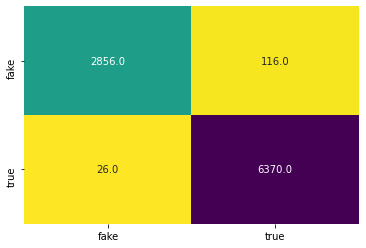

In [ ]:
sns.heatmap(confusion_matrix(y_test, predic_regressor).astype(int),annot=True,cbar=False,xticklabels=['fake','true'],yticklabels=['fake','true'],cmap='viridis_r',fmt='.1f')

In [ ]:
accuracy_score(y_test, predic_regressor)

0.9848420153714774

**98.4% accuracy rate**

In [ ]:
print(classification_report(y_test, predic_regressor))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2972
           1       0.98      1.00      0.99      6396

    accuracy                           0.98      9368
   macro avg       0.99      0.98      0.98      9368
weighted avg       0.98      0.98      0.98      9368



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
predic_tree = tree.predict(xv_test)

<AxesSubplot:>

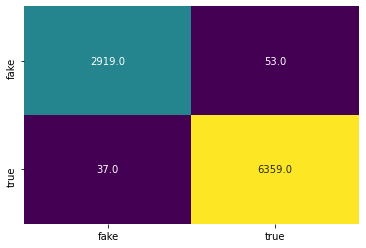

In [ ]:
sns.heatmap(confusion_matrix(y_test, predic_tree).astype(int),annot=True,cbar=False,xticklabels=['fake','true'],yticklabels=['fake','true'],cmap='viridis',fmt='.1f')

In [ ]:
accuracy_score(y_test, predic_tree)

0.990392826643894

**99.03% accuracy**

In [ ]:
print(classification_report(y_test, predic_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2972
           1       0.99      0.99      0.99      6396

    accuracy                           0.99      9368
   macro avg       0.99      0.99      0.99      9368
weighted avg       0.99      0.99      0.99      9368



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=143)
RFC.fit(xv_train, y_train)

In [ ]:
predic_rfc = RFC.predict(xv_test)

In [ ]:
confusion_matrix(y_test, predic_rfc)

In [ ]:
sns.heatmap(confusion_matrix(y_test, predic_rfc).astype(int),annot=True,cbar=False,xticklabels=['fake','true'],yticklabels=['fake','true'],cmap='viridis',fmt='.1f')

In [ ]:
accuracy_score(y_test, predic_rfc)

In [ ]:
print(classification_report(y_test, predic_rfc))

In [ ]:

def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True news!"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predic_regressor = regressor.predict(new_xv_test)
    predic_tree = tree.predict(new_xv_test)
    predic_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {}  \nRFC Prediction: {}".format(output_lable(predic_regressor[0]), 
                                                                                                              output_lable(predic_tree[0]), 
                                                                                                              output_lable(predic_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)